# Data Preprocessing

In [3]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
# parameters
window = 30
neededCol = ['user/throttle', 'as5048a']

In [5]:
# load data from file 
df = pd.read_csv('./data/data_1_20200502105458.csv')
df['milliseconds']=pd.to_datetime(df['milliseconds'], unit='s')
df.set_index('milliseconds', inplace=True)
del df['index']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2101 entries, 2020-05-02 14:54:58.161109209 to 2020-05-02 14:56:28.853392601
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   hcsr04          2101 non-null   float64
 1   ads1115/vm      2101 non-null   float64
 2   ads1115/vp      2101 non-null   float64
 3   as5048a         2101 non-null   float64
 4   bno055/heading  2101 non-null   float64
 5   bno055/roll     2101 non-null   float64
 6   bno055/pitch    2101 non-null   float64
 7   bno055/ori_x    2101 non-null   float64
 8   bno055/ori_y    2101 non-null   float64
 9   bno055/ori_z    2101 non-null   float64
 10  bno055/ori_w    2101 non-null   float64
 11  bno055/temp_c   2101 non-null   int64  
 12  bno055/mag_x    2101 non-null   float64
 13  bno055/mag_y    2101 non-null   float64
 14  bno055/mag_z    2101 non-null   float64
 15  bno055/gyr_x    2101 non-null   float64
 16  bno055/gyr_y    2101 n

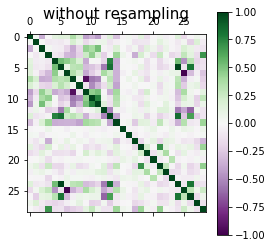

In [6]:
# Correlations among columns
plt.matshow(df.corr(method='spearman'),vmax=1,vmin=-1,cmap='PRGn')
plt.title('without resampling', size=15)
plt.colorbar()
plt.show()

In [7]:
rule_type = '100ms'
resampled = pd.DataFrame()
groups = ['user/throttle','as5048a','user/angle','bno055/heading', 'bno055/roll', 'bno055/pitch', 'ads1115/vm']
for group in groups:
    resampled[group] = df[group].resample(rule_type).bfill()

In [8]:
rule_type = '50ms'
resampled = df.resample(rule_type).bfill()
resampled.head()

,hcsr04,ads1115/vm,ads1115/vp,as5048a,bno055/heading,bno055/roll,bno055/pitch,bno055/ori_x,bno055/ori_y,bno055/ori_z,...,bno055/acc_y,bno055/acc_z,bno055/lacc_x,bno055/lacc_y,bno055/lacc_z,bno055/gra_x,bno055/gra_y,bno055/gra_z,user/angle,user/throttle
milliseconds,,,,,,,,,,,,,,,,,,,,,
2020-05-02 14:54:57.250,26.675844,8.426448,8.314752,0.0,277.375,-2.5,3.4375,-0.036987,-0.003357,0.659424,...,-0.53,8.48,0.11,0.05,-1.29,-0.42,-0.58,9.77,0.0,0.0
2020-05-02 14:54:57.300,28.217351,8.426448,8.314752,0.0,277.375,-2.5,3.4375,-0.036987,-0.003357,0.659424,...,-0.53,8.48,0.11,0.05,-1.29,-0.42,-0.58,9.77,0.0,0.0
2020-05-02 14:54:57.350,26.279223,8.426448,8.314752,0.0,277.375,-2.5,3.4375,-0.036987,-0.003357,0.659424,...,-0.50,8.47,0.10,0.08,-1.30,-0.42,-0.58,9.77,0.0,0.0
2020-05-02 14:54:57.400,24.095762,8.426448,8.314752,0.0,277.375,-2.5,3.4375,-0.036987,-0.003357,0.659424,...,-0.51,8.51,0.10,0.05,-1.31,-0.42,-0.58,9.77,0.0,0.0
2020-05-02 14:54:57.450,24.091673,8.426448,8.314752,0.0,277.375,-2.5,3.4375,-0.036987,-0.003357,0.659424,...,-0.51,8.51,0.10,0.05,-1.31,-0.42,-0.58,9.77,0.0,0.0


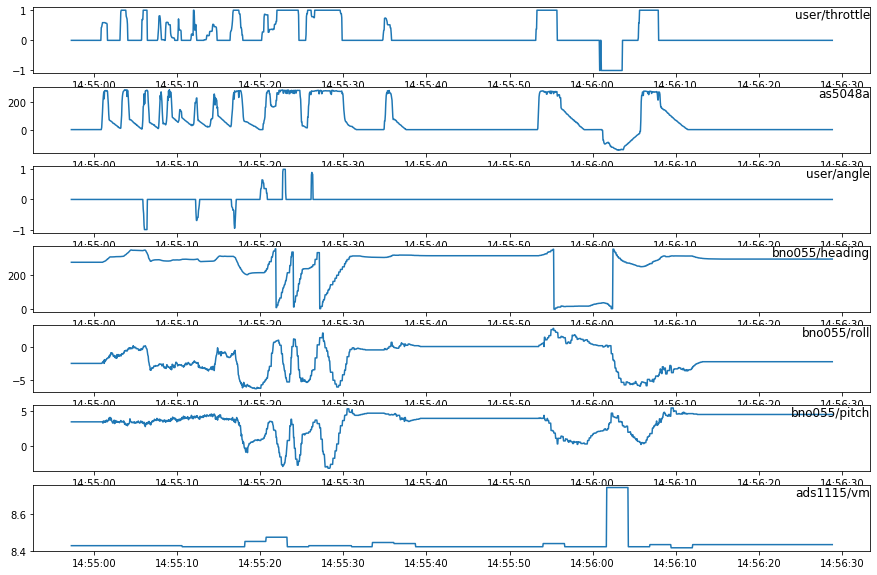

In [9]:
plt.figure(figsize=(15, 10))
i = 1
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(resampled[group])
    plt.title(group, y=0.75, loc='right')
    i += 1
plt.show()

In [10]:
vc = resampled[['user/throttle','as5048a']]
vc

,user/throttle,as5048a
milliseconds,,
2020-05-02 14:54:57.250,0.0,0.0
2020-05-02 14:54:57.300,0.0,0.0
2020-05-02 14:54:57.350,0.0,0.0
2020-05-02 14:54:57.400,0.0,0.0
2020-05-02 14:54:57.450,0.0,0.0
...,...,...
2020-05-02 14:56:28.650,-0.0,0.0
2020-05-02 14:56:28.700,-0.0,0.0
2020-05-02 14:56:28.750,-0.0,0.0


In [11]:
values = vc.values

from sklearn.preprocessing import MinMaxScaler
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)

In [12]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    dff = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(dff.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(dff.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

In [13]:
reframed = series_to_supervised(scaled, window, 1)
print(reframed.head())

    var1(t-30)  var2(t-30)  var1(t-29)  var2(t-29)  var1(t-28)  var2(t-28)  \
30         0.5    0.338837         0.5    0.338837         0.5    0.338837   
31         0.5    0.338837         0.5    0.338837         0.5    0.338837   
32         0.5    0.338837         0.5    0.338837         0.5    0.338837   
33         0.5    0.338837         0.5    0.338837         0.5    0.338837   
34         0.5    0.338837         0.5    0.338837         0.5    0.338837   

    var1(t-27)  var2(t-27)  var1(t-26)  var2(t-26)  ...  var1(t-4)  var2(t-4)  \
30         0.5    0.338837         0.5    0.338837  ...        0.5   0.338837   
31         0.5    0.338837         0.5    0.338837  ...        0.5   0.338837   
32         0.5    0.338837         0.5    0.338837  ...        0.5   0.338837   
33         0.5    0.338837         0.5    0.338837  ...        0.5   0.338837   
34         0.5    0.338837         0.5    0.338837  ...        0.5   0.338837   

    var1(t-3)  var2(t-3)  var1(t-2)  var2(t-

In [14]:
# split into train and test sets
values = reframed.values
print(values.shape)

(1803, 62)


In [15]:
share = values.shape[0]//10
p1 = share*5
p2 = share*6
train1 = values[:p1, :]
test = values[p1:p2, :]
train2 = values[p2:, :]
train = np.concatenate((train1,train2))
print(test.shape[0],train.shape[0])

180 1623


In [16]:
train_x, train_y = train[:, :-2], train[:, -1]
test_x, test_y = test[:, :-2], test[:, -1]
# reshape NxTxD
train_x = train_x.reshape((train_x.shape[0], window, len(neededCol)))
test_x = test_x.reshape((test_x.shape[0], window, len(neededCol)))
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(1623, 30, 2) (1623,) (180, 30, 2) (180,)


In [16]:
a = np.zeros((0,window,len(neededCol)), dtype=np.float64)
a = np.concatenate((a,train_x,test_x))
b = np.zeros((0,), dtype=np.float64)
b = np.concatenate((b,train_y,test_y))
print(a.shape, b.shape)

(1803, 30, 2) (1803,)


In [17]:
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

# make the RNN
i = Input(shape=(window, len(neededCol)))
x = LSTM(100)(i)  # 10 is hidden feature dimensionality
x = Dropout(0.2)(x)
x = Dense(1)(x)  # 1 is output size
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(),
)

In [28]:
# train the RNN
r = model.fit(
  train_x, train_y,
  batch_size=70,
  epochs=50,
  validation_data=(test_x, test_y),
)

Train on 1623 samples, validate on 180 samples
Epoch 1/50
1623/1623 [==============================] - 1s 889us/sample - loss: 0.0817 - val_loss: 2.4804e-04
Epoch 2/50
1623/1623 [==============================] - 0s 54us/sample - loss: 0.0143 - val_loss: 0.0020
Epoch 3/50
1623/1623 [==============================] - 0s 55us/sample - loss: 0.0110 - val_loss: 0.0018
Epoch 4/50
1623/1623 [==============================] - 0s 64us/sample - loss: 0.0084 - val_loss: 8.3524e-04
Epoch 5/50
1623/1623 [==============================] - 0s 52us/sample - loss: 0.0073 - val_loss: 8.4594e-04
Epoch 6/50
1623/1623 [==============================] - 0s 49us/sample - loss: 0.0063 - val_loss: 3.7452e-04
Epoch 7/50
1623/1623 [==============================] - 0s 48us/sample - loss: 0.0055 - val_loss: 8.6031e-04
Epoch 8/50
1623/1623 [==============================] - 0s 50us/sample - loss: 0.0050 - val_loss: 7.9774e-04
Epoch 9/50
1623/1623 [==============================] - 0s 49us/sample - loss: 0.0048 - 

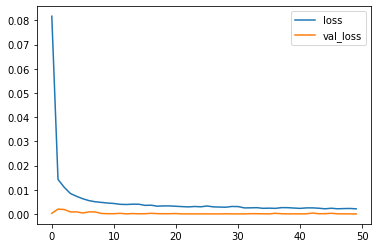

In [29]:
import matplotlib.pyplot as plt
# plot some data
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

plt.show()

In [18]:
model_path = 'weight.ckpt'
model.load_weights(model_path)

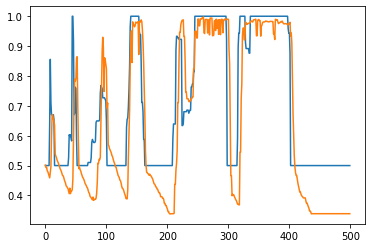

In [20]:
plt.plot(scaled[250:750])

In [25]:
mtest = scaled[250:750]
step = 1
predict = []

import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

for i in range(400):
    input = mtest[i:i+window, :]
    re = model.predict(input.reshape(1, window, len(neededCol)))
    predict.append(re)
plt.plot(predict)

RuntimeError: Physical devices cannot be modified after being initialized